In [1]:
# Import all the required packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Making a functioin to call the data
def load_housing_data():
    url = ("https://raw.githubusercontent.com/abdelaziztestas/spark_book/main/housing.csv")
    return pd.read_csv(url)

In [3]:
# Calling the function
pandas_df = load_housing_data()

In [4]:
# Viewing the first 5 rows in the dataset
pandas_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
print(f"Shape of the dataset: {pandas_df.shape}")

Shape of the dataset: (545, 13)


In [6]:
# Information about the dataset
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
pandas_null_content = pandas_df.isnull().sum()
print(f"Null values in the dataset: \n{pandas_null_content}")

Null values in the dataset: 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
# description of the dataset
pandas_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
# List of the columns with the categorical data
cols = ["mainroad", "guestroom", "basement", "hotwaterheating",
        "airconditioning", "prefarea", "furnishingstatus"]

In [10]:
# Unique values in each of the categorical columns
for col in cols:
    unique_values = pandas_df[col].unique()
    print(f"Unique Values in {col}: {unique_values}")

Unique Values in mainroad: ['yes' 'no']
Unique Values in guestroom: ['no' 'yes']
Unique Values in basement: ['no' 'yes']
Unique Values in hotwaterheating: ['no' 'yes']
Unique Values in airconditioning: ['yes' 'no']
Unique Values in prefarea: ['yes' 'no']
Unique Values in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [11]:
# Splitting the data into X and y dataset
X = pandas_df.drop("price", axis = 1)
y = pandas_df["price"]

In [12]:
# Using OneHotEncoder on the columns
onehot_encoder = OneHotEncoder(sparse_output = False)
X_encoded = onehot_encoder.fit_transform(X[cols])

In [13]:
# Making the encoded columns into a Pandas DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns = onehot_encoder.get_feature_names_out(cols))

In [14]:
# Droping all the cols
X.drop(cols, axis = 1, inplace = True)

# Concatting the original data with the encoded dataframe
X = pd.concat([X, X_encoded_df], axis = 1)

In [15]:
# Splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.2)

In [16]:
# Training the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [17]:
# Making predictions on the test dataset
y_pred = model.predict(X_test)

In [18]:
# Evaluating the r2 score of the model
r2 = r2_score(y_test, y_pred)
print(f"r2 score of the model: {r2}")

r2 score of the model: 0.37809450730586747


In [19]:
# Evaluating the rmse of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"rmse of the model: {rmse}")

rmse of the model: 1439044.8308615538


In [20]:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
print("Feature importances:")
for i in indices:
    print(feature_names[i], ":", importances[i])

Feature importances:
area : 0.5027967269813287
bathrooms : 0.16604735484482958
bedrooms : 0.05718910044693602
parking : 0.05268491241355717
stories : 0.04566181190025784
basement_yes : 0.03563489394693117
furnishingstatus_unfurnished : 0.028694019779015832
airconditioning_yes : 0.019598803674114075
prefarea_no : 0.015745127864297322
furnishingstatus_semi-furnished : 0.013540175519885617
airconditioning_no : 0.012454605570382037
guestroom_yes : 0.012208714111648694
hotwaterheating_yes : 0.011742988412779935
furnishingstatus_furnished : 0.007796463868532917
mainroad_yes : 0.006644104349072721
prefarea_yes : 0.004932584759188267
basement_no : 0.002422837928261507
hotwaterheating_no : 0.002355912562112156
guestroom_no : 0.0014165817734184858
mainroad_no : 0.0004322792934498974


In [22]:
result_df = pd.DataFrame({"Prices": y_test, "Prediction": y_pred})
print(result_df.head())

      Prices  Prediction
542  1750000   2870000.0
70   6790000   6615000.0
504  2653000   3675000.0
221  4767000   4200000.0
519  2450000   3360000.0


In [23]:
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R-squared score on training data: ", r2_train)

R-squared score on training data:  0.998904262465691


**Overfitting**

The r2 score on the train dataset is 99.8% which is much higher compared to r2 score on the test dataset which is 37.8%.

Which is a strong indicator of overfitting. 

In [24]:
# Importing the required libraries 
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [35]:
# Defining a function that will plot the r2 scores of the training and testing dataset
def plot_learning_curve(estimator, title, X, y, ylim=None,
                        cv=None, n_jobs=None,
                        train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.4, color="r")
    
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.4, color="g")
    
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross Validation score")
    plt.legend(loc="best")
    return plt

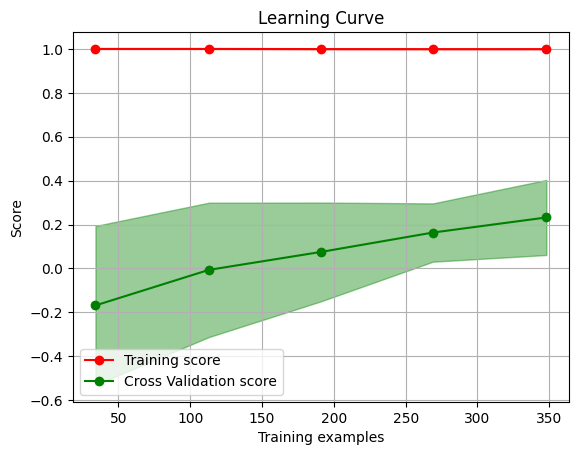

In [36]:
plot_learning_curve(model, "Learning Curve", X = X_train, y = y_train, cv = 5)
plt.show()